In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
# Load the Iris dataset

In [2]:
iris = load_iris(as_frame=True)
df = iris.frame

In [ ]:
# Display the first few rows

In [3]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Explore the structure of the dataset

In [4]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Check for missing values

In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
Task 2: Basic Data Analysis.

In [ ]:
# Compute basic statistics for numerical columns

In [6]:
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
# Group by the 'target' column (representing different Iris species) and compute the mean of features

In [7]:
print("\nMean of features grouped by Iris species:")
print(df.groupby('target').mean())


Mean of features grouped by Iris species:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                           
0                   5.006             3.428              1.462   
1                   5.936             2.770              4.260   
2                   6.588             2.974              5.552   

        petal width (cm)  
target                    
0                  0.246  
1                  1.326  
2                  2.026  


In [ ]:
# Observations:
# - The 'describe()' output gives us a sense of the distribution of each numerical feature (mean, standard deviation, min, max, quartiles).
# - Grouping by 'target' shows us the average measurements for each Iris species. For example, Setosa (target 0) tends to have smaller sepal and petal lengths compared to Versicolor (target 1) and Virginica (target 2).

In [ ]:
Task 3: Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Set a visually appealing style using seaborn

In [9]:
sns.set(style="whitegrid")

In [ ]:
# 1. Bar chart: Mean petal length per species

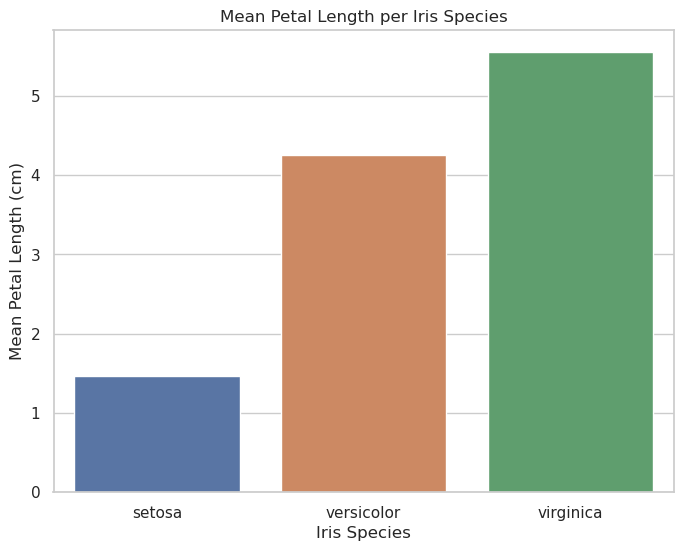

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x=iris.target_names, y=df.groupby('target')['petal length (cm)'].mean())
plt.title('Mean Petal Length per Iris Species')
plt.xlabel('Iris Species')
plt.ylabel('Mean Petal Length (cm)')
plt.show()

In [ ]:
# 2. Histogram: Distribution of sepal width

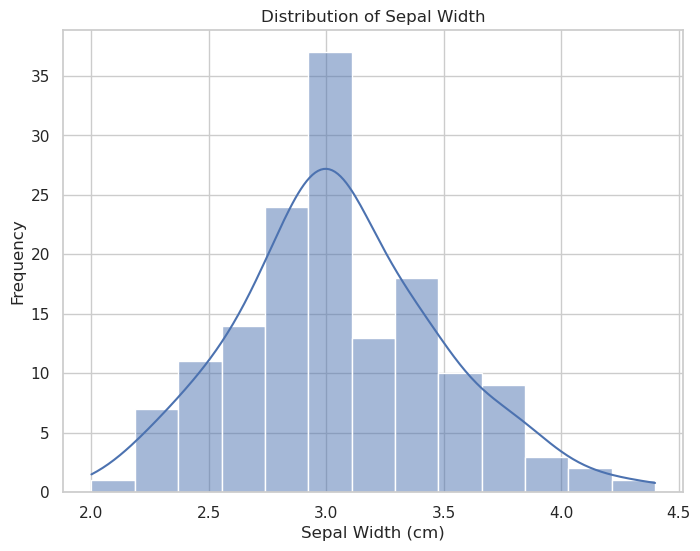

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 3. Scatter plot: Sepal length vs. petal length

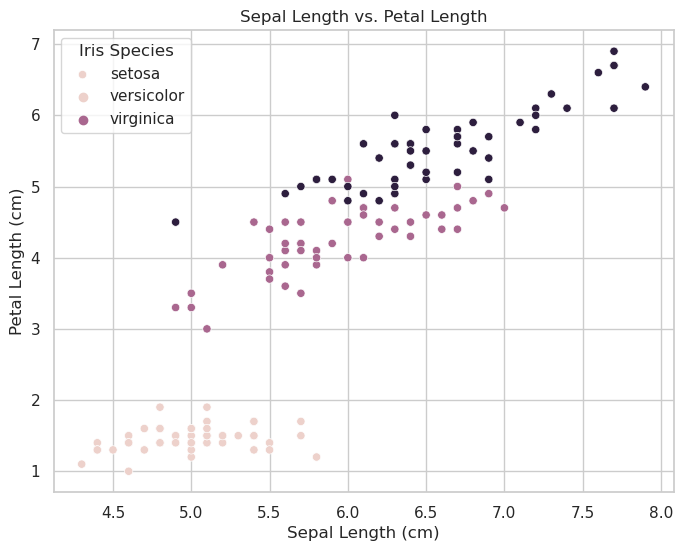

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target', data=df)
plt.title('Sepal Length vs. Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Iris Species', labels=iris.target_names)
plt.show()

In [ ]:
# 4. Line chart: This dataset isn't ideal for a typical time-series line chart.
#    However, we can create a line plot showing the mean of each feature for each species

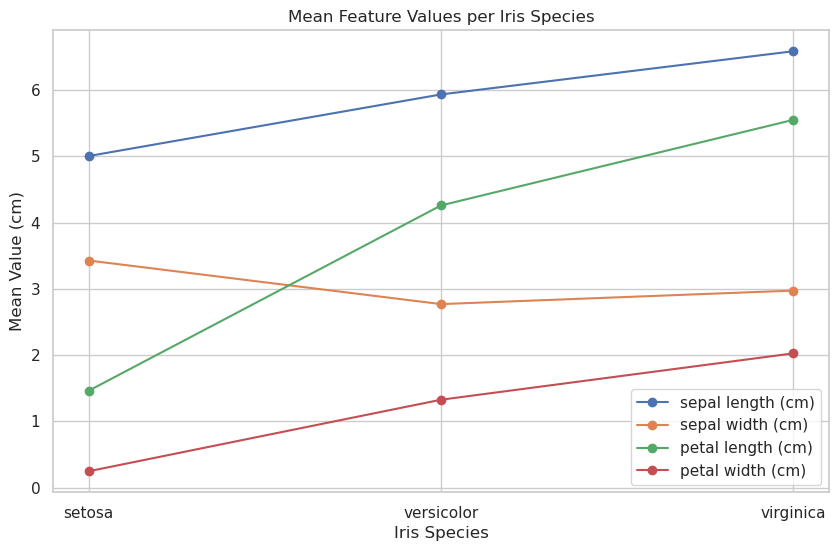

In [13]:
mean_features = df.groupby('target').mean()
plt.figure(figsize=(10, 6))
for column in mean_features.columns:
    plt.plot(iris.target_names, mean_features[column], marker='o', label=column)
plt.title('Mean Feature Values per Iris Species')
plt.xlabel('Iris Species')
plt.ylabel('Mean Value (cm)')
plt.legend()
plt.grid(True)
plt.show()